In [1]:
cd /home

/home


In [2]:
import tensorflow as tf
import pandas as pd 

import matplotlib.pyplot as plt

import os

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

%load_ext autoreload
%autoreload 2

from src.data.loaders import load_data

2023-07-04 22:50:34.126883: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-04 22:50:34.259355: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.3) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## RECORDS

In [74]:
data = load_data('./data/records/macho_clean/test/',
                    batch_size=32,
                    window_size=200,
                    sampling=True,
                    nsp_prob=.5)

[INFO] Sampling random windows


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


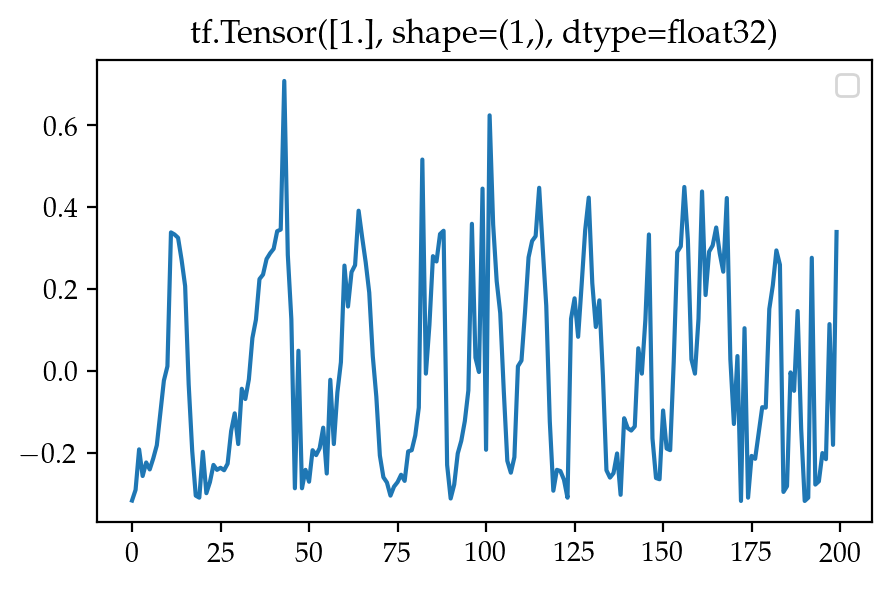

In [75]:
plt.figure(figsize=(5, 3), dpi=200)
for x, y in data.take(1):
    
    curr_x = x['magnitudes'][0, 1:, 0]
    curr_m = x['mask'][0]
    
    curr_x = tf.boolean_mask(curr_x, curr_m)
    
    plt.title(str(y['nsp_label'][0]))
    plt.plot(curr_x)
    plt.legend()
plt.show()

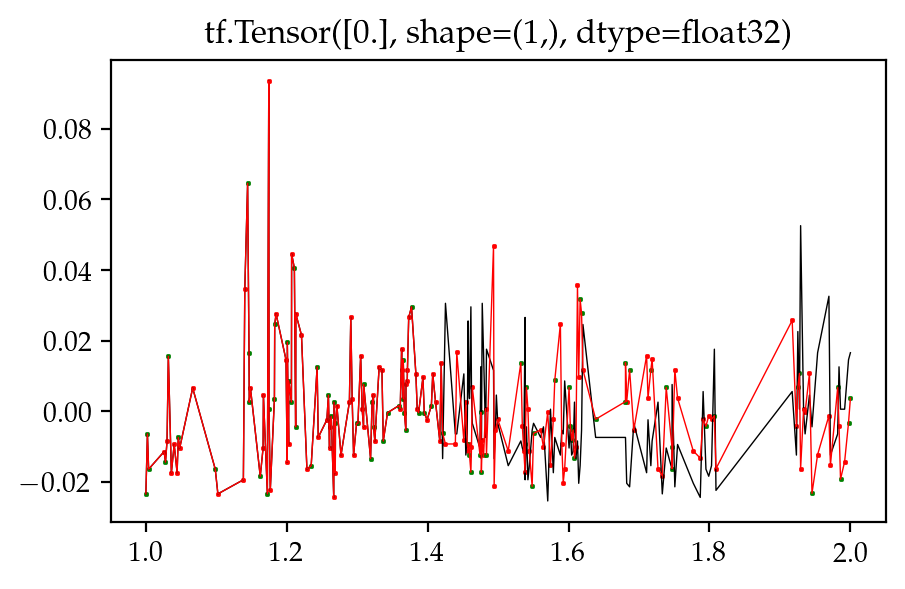

In [78]:
import numpy as np
plt.figure(figsize=(5, 3), dpi=200)
for x, y in data.take(1):
    
    N =1
    
    original   = x['original'][N]
    mask       = x['mask'][N]
    magnitudes = x['magnitudes'][N, 1:, 0]
    att_mask   = x['att_mask'][N, 1:, 0]
    times      = x['times'][N, 1:, 0]
    
    visible = tf.boolean_mask(magnitudes, 1.-att_mask)    
    times_visible = tf.boolean_mask(times, 1.-att_mask) 
    
    target = y['magnitudes'][N, :, 0]
    target = tf.boolean_mask(target, y['probed_mask'][N, :, 0])
    
    times_target = tf.boolean_mask(times, y['probed_mask'][N, :, 0]) 
    
    plt.scatter(times_visible, visible, marker='s', s=1, color='r')
    plt.scatter(times_target, target, marker='s', s=1, color='g')
    
    original = tf.boolean_mask(original, mask)
    times = tf.boolean_mask(times, mask)
    
    inputs = tf.boolean_mask(magnitudes, mask)

    plt.plot(times, original[:, 1], linestyle='-', linewidth=.5, color='k')
    plt.plot(times, inputs, linestyle='-', linewidth=.5, color='r')
    
    plt.title(str(y['nsp_label'][N]))